In [443]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import os
import json
from timeit import default_timer as timer

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [444]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [445]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(r.content)

In [446]:
images = pd.read_table('image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [447]:
"""
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
"""

'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = archi

In [448]:
tweets = pd.read_json('tweet-json.txt', lines = True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Archive

In [449]:
archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN


In [450]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

#### There's a lot of names that aren't really names. They are all lowercase so they'll be an easy find.

In [451]:
non_names = archive[list(map(lambda x: x.islower() and x != 'nan', archive['name'].astype(str)))]['name']
for n in non_names:
    print(n)

such
a
quite
quite
quite
not
one
incredibly
a
mad
an
very
a
very
just
my
one
not
his
one
a
a
a
an
very
actually
a
just
getting
mad
very
this
unacceptable
all
a
old
a
infuriating
a
a
a
an
a
a
very
getting
just
a
the
the
actually
by
a
officially
a
the
the
a
a
a
a
life
a
one
a
a
a
light
just
space
a
the
a
a
a
a
a
a
a
a
a
an
a
the
a
a
a
a
a
a
a
a
a
a
a
quite
a
an
a
an
the
the
a
a
an
a
a
a
a


#### Checking for upper_case only names

In [452]:
upper_case_only = archive[list(map(lambda x: x.isupper() and x != 'nan', archive['name'].astype(str)))]['name']
for n in upper_case_only:
    print(n)

O
JD


#### O appears yet when investigating the text of the tweet it is spelled out fully as O'Malley

### Images

In [453]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [454]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [455]:
images['p1'].value_counts()

p1
golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
Siberian_husky                     20
German_shepherd                    20
Staffordshire_bullterrier          20
Cardigan                           19
web_site                           19
Eskimo_dog                         18
Maltese_dog                        18
Shetland_sheepdog                  18
teddy                              18
beagle                             18
Lakeland_terrier                   17
Rottweile

#### There are lots of values that contain uppercase letters and underscores instead of spaces in columns "p1", "p2", "p3".

### Tweets

In [456]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

#### There are lots of completely or almost completely null values in the tweets data set. The "id" column name does not match the "tweet_id" column name which will cause problems with joining the datasets.

#### We also see that there are 179 tweets that are retweeted meaning they are duplicates.

## Issues

### Quality issues

#### Archive Dataset

1. There are several instances of duplicated rows through retweets.

2. There are values in the name column that are not names such as "a", "an", "such", "the", "officially", "actually", "quite", etc.

3. There are names that are not correct such as "O" instead of "O'Malley"

4. There are rows with two types of dogs (ex: doggo and pupper)

#### Images Dataset

5. The values in columns p1, p2, and p3 need to be standardized with all lowercase characters and " "s instead of "_"s

#### Tweets Dataset

6. Duplicates involved with retweets

7. The column name "id" does not match the "tweet_id" columns in the other two datasets, this should be changed to ensure a join will work

8. All unecessary columns will need to be removed from each dataset



### Tidiness issues
#### Archive Dataset
1. Instead of having one column that stores the type of dog there are 4 columns. Each column variable either has the type of the dog stored to indicate that is what the type is, or none.

2. Instead of having a "rating numerator" and "rating denominator" columns it would make more sense to divide the numerator by the denominator and store the value as a float to perform mathematical analyses.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [457]:
# Make copies of original pieces of data
archive_clean = archive.copy()
images_clean = images.copy()
tweets_clean = tweets.copy()


## Archive Dataset

### Quality Issues

### Issue #1: Duplicated Rows from Retweets

#### Define: Remove all rows where "retweeted_status_id" is not null and drop "retweeted_status_id", "retweeted_status_user_id", and "retweeted_status_timestamp" columns

#### Code

In [458]:
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isna()]
archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [459]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   1495 non-null   object 
 10  doggo                  87 non-null     object 
 11  floofer                10 non-null     object 
 12  pupper                 234 non-null    object 
 13  puppo                  25 non-null     object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


### Issue #2: Values in name column that aren't names

#### Define: Locate every value in the column that contains no uppercase letters and replace them with "NaN"

#### Code

In [460]:
archive_clean['name'].loc[map(lambda x: x.islower() and x != 'nan', archive_clean['name'].astype(str))] = 'NaN'

C:\Users\sirco\AppData\Local\Temp\ipykernel_18816\3758502267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean['name'].loc[map(lambda x: x.islower() and x != 'nan', archive_clean['name'].astype(str))] = 'NaN'


#### Test

In [461]:
# If the code worked this should return 0
non_name_count = 0
lc_names = list(map(lambda x: x.islower() and x != 'nan', archive_clean['name'].astype(str)))
for n in lc_names:
    if n == True:
        non_name_count += 1

print(non_name_count)

0


### Issue #3: There are names that are not correct such as "O" instead of "O'Malley"

#### Define: Locate the row with the incorrect name and fix it.

#### Code

In [462]:
archive_clean['name'].replace('O', "O'Malley", inplace = True)

#### Test

In [463]:
archive_clean[archive_clean['name'] == "O'Malley"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O'Malley,NaN,NaN,NaN,NaN


### Tidiness Issue #1: Instead of having one column that stores the type of dog there are 4 columns. Each column variable either has the type of the dog stored to indicate that is what the type is, or none.

#### Define: Fill all NaN values with "None" and then convert the involved columns to string data type. Combine all columns into one type column. Drop the columns "doggo", "floofer", "pupper", and "puppo" as they are no longer needed. 

#### Code

In [464]:
archive_clean['doggo'].fillna('None', inplace = True)
archive_clean['floofer'].fillna('None', inplace = True)
archive_clean['pupper'].fillna('None', inplace = True)
archive_clean['puppo'].fillna('None', inplace = True)

In [465]:
archive_clean['doggo'] = archive_clean['doggo'].astype('string')
archive_clean['floofer'] = archive_clean['floofer'].astype('string')
archive_clean['pupper'] = archive_clean['pupper'].astype('string')
archive_clean['puppo'] = archive_clean['puppo'].astype('string')


In [466]:
archive_clean['type'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']

In [467]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   1495 non-null   object 
 10  doggo                  2175 non-null   string 
 11  floofer                2175 non-null   string 
 12  pupper                 2175 non-null   string 
 13  puppo                  2175 non-null   string 
 14  type                   2175 non-null   string 
dtypes: float6

In [468]:
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

#### Test

In [469]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   1495 non-null   object 
 10  type                   2175 non-null   string 
dtypes: float64(2), int64(3), object(5), string(1)
memory usage: 203.9+ KB


### Quality Issue #4: There are rows with two types of dogs (ex: doggo and pupper)

In [470]:
archive_clean['type'].value_counts()

type
NoneNoneNoneNone        1831
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: count, dtype: Int64

#### Define: There are several instances of type values with multiple names. 10 instances of "doggoNonepupperNone", 1 instance of "doggoNoneNonepuppo", and 1 instance of "doggoflooferNoneNone". We'll have to examine each of these case-by-case to see what the correct value is.

In [471]:
archive_clean.query('type == "doggoNoneNonepuppo"')['text']

191    Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
Name: text, dtype: object

#### Code
- We can clearly see from this instance that the type is "puppo" though the word "doggo" is used. We should set the type to "puppo"

In [472]:
archive_clean['type'].replace('doggoNoneNonepuppo', 'puppo', inplace = True)


#### Test

In [473]:
archive_clean.query('type == "puppo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,NaN,puppo


#### Define: Check "doggoflooferNoneNone" text column for correct answer

In [474]:
archive_clean.query('type == "doggoflooferNoneNone"')['text']

200    At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
Name: text, dtype: object

#### Code

- This type is obviously "floofer" based on the text

In [475]:
archive_clean['type'].replace('doggoflooferNoneNone', 'floofer', inplace = True)

#### Test

In [476]:
archive_clean.query('type == "floofer"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,NaN,floofer


#### Define: Investigate the "doggoNonepupperNone" values

In [477]:
archive_clean.query('type == "doggoNonepupperNone"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggoNonepupperNone
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,NaN,doggoNonepupperNone
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,NaN,doggoNonepupperNone
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggoNonepupperNone
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggoNonepupperNone
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",https://vine.co/v/5rgu2Law2ut,12,10,NaN,doggoNonepupperNone
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggoNonepupperNone
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5,10,NaN,doggoNonepupperNone
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12,10,NaN,doggoNonepupperNone
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",https://twitter.com/dog_rates/status/733109485275860992/photo/1,12,10,NaN,doggoNonepupperNone


#### Code
- We can see that there is an obvious answer in the text column for the tweet_ids "817777686764523521", "801115127852503040", and "785639753186217984" so we will fix them

In [478]:
archive_clean.loc[archive_clean['tweet_id'] == 817777686764523521, 'type']  = 'pupper'
archive_clean.loc[archive_clean['tweet_id'] == 801115127852503040, 'type'] = 'pupper'
archive_clean.loc[archive_clean['tweet_id'] == 785639753186217984, 'type'] = 'doggo'

#### Test

In [479]:
archive_clean[archive_clean['tweet_id'] == 817777686764523521]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,pupper


In [480]:
archive_clean[archive_clean['tweet_id'] == 801115127852503040]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,pupper


In [481]:
archive_clean[archive_clean['tweet_id'] == 785639753186217984]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo


#### Code
- Since the rest of the rows with the type "doggoNonepupperNone" aren't easily discernable or seem to contain multiple dogs, we'll set their values to "none"

In [482]:
archive_clean['type'].replace('doggoNonepupperNone', 'none', inplace = True)

#### Test

In [483]:
# If it worked this code should return 0
archive_clean[archive_clean['type'] == 'doggoNonepupperNone']['type'].count()

0

#### Define: Let's do the same with the rest of values in the 'type' column

#### Code

In [484]:
archive_clean['type'].replace('NoneNoneNoneNone', 'none', inplace = True)
archive_clean['type'].replace('NoneNonepupperNone', 'pupper', inplace = True)
archive_clean['type'].replace('doggoNoneNoneNone', 'doggo', inplace = True)
archive_clean['type'].replace('NoneNoneNonepuppo', 'puppo', inplace = True)
archive_clean['type'].replace('NoneflooferNoneNone', 'floofer', inplace = True)

#### Test

In [485]:
archive_clean['type'].value_counts()

type
none       1838
pupper      226
doggo        76
puppo        25
floofer      10
Name: count, dtype: Int64

### Tidiness Issue #2: Instead of having a "rating numerator" and "rating denominator" columns it would make more sense to divide the numerator by the denominator and store the value as a float to perform mathematical analyses.

### Define: Create a new "rating score" column that stores the numerator divided by the denominator as a float

#### Code

In [486]:
archive_clean['rating_score'] = archive_clean['rating_numerator'].astype(float) / archive_clean['rating_denominator'].astype(float)

#### Test

In [487]:
archive_clean[['rating_numerator', 'rating_denominator', 'rating_score']].sample(15)

,rating_numerator,rating_denominator,rating_score
688,11,10,1.1
1517,10,10,1.0
738,11,10,1.1
2030,13,10,1.3
1428,11,10,1.1
708,12,10,1.2
270,13,10,1.3
539,13,10,1.3
394,12,10,1.2
1464,10,10,1.0


## Images Dataset

#### Issue #5: The values in columns p1, p2, and p3 need to be standardized with all lowercase characters and contain " "s instead of "_"s

#### Define: Set data types of the columns "p1", "p2", and "p3" to strings instead of objects. This will allows us to perform text transformations.

#### Code

In [488]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [489]:
images_clean['p1'] = images_clean['p1'].astype('string')
images_clean['p2'] = images_clean['p2'].astype('string')
images_clean['p3'] = images_clean['p3'].astype('string')
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   string 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   string 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   string 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(1), string(3)
memory usage: 152.1+ KB


In [490]:
images_clean['p1'] = images_clean['p1'].str.replace('_', ' ')
images_clean['p1'] = images_clean['p1'].str.lower()
images_clean['p2'] = images_clean['p2'].str.replace('_', ' ')
images_clean['p2'] = images_clean['p2'].str.lower()
images_clean['p3'] = images_clean['p3'].str.replace('_', ' ')
images_clean['p3'] = images_clean['p3'].str.lower()

#### Test

In [491]:
images_clean[['p1', 'p2', 'p3']].sample(15)

,p1,p2,p3
1579,golden retriever,labrador retriever,seat belt
1575,golden retriever,labrador retriever,doormat
314,kuvasz,samoyed,white wolf
801,bernese mountain dog,border collie,entlebucher
706,llama,triceratops,hog
1429,tabby,norwegian elkhound,wombat
743,wood rabbit,angora,hare
1301,german shepherd,eskimo dog,siberian husky
1006,siberian husky,eskimo dog,labrador retriever
1010,shetland sheepdog,collie,keeshond


## Tweets Dataset

### Issue #6: Duplicates involved with retweets

#### Define: Remove all rows with non-NaN retweeted_status column values

#### Code

In [492]:
tweets_clean = tweets_clean[tweets_clean['retweeted_status'].isna()]

#### Test

In [493]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2175 non-null   datetime64[ns, UTC]
 1   id                             2175 non-null   int64              
 2   id_str                         2175 non-null   int64              
 3   full_text                      2175 non-null   object             
 4   truncated                      2175 non-null   bool               
 5   display_text_range             2175 non-null   object             
 6   entities                       2175 non-null   object             
 7   extended_entities              1994 non-null   object             
 8   source                         2175 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_str    

### Issue #7: The column name "id" does not match the "tweet_id" columns in the other two datasets, this should be changed to ensure a join will work

#### Define: Rename "id" column to "tweet_id"

#### Code

In [494]:
tweets_clean = tweets_clean.rename(columns = {'id': 'tweet_id'})

#### Test

In [495]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2175 non-null   datetime64[ns, UTC]
 1   tweet_id                       2175 non-null   int64              
 2   id_str                         2175 non-null   int64              
 3   full_text                      2175 non-null   object             
 4   truncated                      2175 non-null   bool               
 5   display_text_range             2175 non-null   object             
 6   entities                       2175 non-null   object             
 7   extended_entities              1994 non-null   object             
 8   source                         2175 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_str    

### Issue #8: Remove all unecessary columns from each dataset

#### Define: Let's first fix the "tweet_id" column datatype by setting it to string in each of the data sets
#### Code

In [496]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('string')
images_clean['tweet_id'] = images_clean['tweet_id'].astype('string')
tweets_clean['tweet_id'] = tweets_clean['tweet_id'].astype('string')

#### Test

In [497]:
archive_clean.dtypes

tweet_id                 string[python]
in_reply_to_status_id           float64
in_reply_to_user_id             float64
timestamp                        object
source                           object
text                             object
expanded_urls                    object
rating_numerator                  int64
rating_denominator                int64
name                             object
type                     string[python]
rating_score                    float64
dtype: object

In [498]:
images_clean.dtypes

tweet_id    string[python]
jpg_url             object
img_num              int64
p1          string[python]
p1_conf            float64
p1_dog                bool
p2          string[python]
p2_conf            float64
p2_dog                bool
p3          string[python]
p3_conf            float64
p3_dog                bool
dtype: object

In [499]:
tweets_clean.dtypes

created_at                       datetime64[ns, UTC]
tweet_id                              string[python]
id_str                                         int64
full_text                                     object
truncated                                       bool
display_text_range                            object
entities                                      object
extended_entities                             object
source                                        object
in_reply_to_status_id                        float64
in_reply_to_status_id_str                    float64
in_reply_to_user_id                          float64
in_reply_to_user_id_str                      float64
in_reply_to_screen_name                       object
user                                          object
geo                                          float64
coordinates                                  float64
place                                         object
contributors                                 f

#### Define: Let's drop unwanted columns from the archive dataset
#### Code

In [500]:
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator'], axis = 1, inplace = True)

In [501]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      2175 non-null   string 
 1   name          1495 non-null   object 
 2   type          2175 non-null   string 
 3   rating_score  2175 non-null   float64
dtypes: float64(1), object(1), string(2)
memory usage: 85.0+ KB


#### Define: Drop the "img_num" column from the images dataset
#### Code

In [502]:
images_clean.drop(['img_num'], axis = 1, inplace = True)

#### Test

In [503]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   string 
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   string 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   string 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   string 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), object(1), string(4)
memory usage: 135.9+ KB


#### Define: The Tweets dataset has a lot of data we don't need. Let's keep only the "tweet_id", "favorite_count", and "retweet_count" columns
#### Code

In [504]:
tweets_clean = tweets_clean[['tweet_id', 'favorite_count', 'retweet_count']]

#### Test

In [505]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2175 non-null   string
 1   favorite_count  2175 non-null   int64 
 2   retweet_count   2175 non-null   int64 
dtypes: int64(2), string(1)
memory usage: 68.0 KB


#### Define: Merging all datasets into one master data set
#### Code

In [506]:
master = pd.merge(archive_clean, tweets_clean, on = 'tweet_id', how = 'inner')
master = pd.merge(master, images_clean, on = 'tweet_id', how = 'inner')

#### Test

In [507]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1994 non-null   string 
 1   name            1448 non-null   object 
 2   type            1994 non-null   string 
 3   rating_score    1994 non-null   float64
 4   favorite_count  1994 non-null   int64  
 5   retweet_count   1994 non-null   int64  
 6   jpg_url         1994 non-null   object 
 7   p1              1994 non-null   string 
 8   p1_conf         1994 non-null   float64
 9   p1_dog          1994 non-null   bool   
 10  p2              1994 non-null   string 
 11  p2_conf         1994 non-null   float64
 12  p2_dog          1994 non-null   bool   
 13  p3              1994 non-null   string 
 14  p3_conf         1994 non-null   float64
 15  p3_dog          1994 non-null   bool   
dtypes: bool(3), float64(4), int64(2), object(2), string(5)
memory usage: 208.5+ KB

In [508]:
master.head()

,tweet_id,name,type,rating_score,favorite_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,Phineas,none,1.3,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,Tilly,none,1.3,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,Archie,none,1.2,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,Darla,none,1.3,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,Franklin,none,1.2,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [509]:
master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### Let's observe the accuracy of the image prediction algorith by combining all of the "p1", "p2", and "p3" columns with their related columns "p_conf" and "p_dog"

In [510]:
p1_df = master[['p1', 'p1_conf', 'p1_dog']]
p1_df.rename(columns = {'p1': 'p', 'p1_conf': 'p_conf', 'p1_dog': 'p_dog'}, inplace = True)

p2_df = master[['p2', 'p2_conf', 'p2_dog']]
p2_df.rename(columns = {'p2': 'p', 'p2_conf': 'p_conf', 'p2_dog': 'p_dog'}, inplace = True)

p3_df = master[['p3', 'p3_conf', 'p3_dog']]
p3_df.rename(columns = {'p3': 'p', 'p3_conf': 'p_conf', 'p3_dog': 'p_dog'}, inplace = True)

# Adding a 'p_num' column to the datasets to ensure that they combine
p1_df['p_num'] = 1
p2_df['p_num'] = 2
p3_df['p_num'] = 3

datasets = [p1_df, p2_df, p3_df]
p_df = pd.concat(datasets)

C:\Users\sirco\AppData\Local\Temp\ipykernel_18816\1702990996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1_df.rename(columns = {'p1': 'p', 'p1_conf': 'p_conf', 'p1_dog': 'p_dog'}, inplace = True)
C:\Users\sirco\AppData\Local\Temp\ipykernel_18816\1702990996.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2_df.rename(columns = {'p2': 'p', 'p2_conf': 'p_conf', 'p2_dog': 'p_dog'}, inplace = True)
C:\Users\sirco\AppData\Local\Temp\ipykernel_18816\1702990996.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

#### Test

In [511]:
p_df.sample(15)

,p,p_conf,p_dog,p_num
1495,french bulldog,0.009840,True,3
1740,keeshond,0.994065,True,1
1793,pekinese,0.000516,True,3
1446,staffordshire bullterrier,0.689259,True,1
1176,mexican hairless,0.162638,True,1
1445,boxer,0.000462,True,3
504,leonberg,0.512034,True,1
35,brabancon griffon,0.044002,True,3
815,great pyrenees,0.157081,True,3
832,doormat,0.028075,False,3


#### Let's get rid of all values that failed to return a dog and drop the "p_dog" and "p_num" columns as we no longer need them

In [512]:
p_df = p_df[p_df['p_dog'] == True]
p_df.drop(['p_dog', 'p_num'], axis = 1, inplace = True)
p_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4418 entries, 1 to 1993
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   p       4418 non-null   string 
 1   p_conf  4418 non-null   float64
dtypes: float64(1), string(1)
memory usage: 103.5 KB


#### Finally let's group by the "p" column and view the average confidence and count of each "p" value

In [513]:
p_avg = pd.DataFrame(p_df.groupby('p')['p_conf'].mean())
p_cou = pd.DataFrame(p_df.groupby('p')['p'].count())
p_cou.rename(columns = {'p': 'p_count'}, inplace = True)
p_full = p_avg.join(p_cou, on = 'p')
p_full.sort_values(by = 'p_conf', ascending = False)

,p_conf,p_count
p,,
bernese mountain dog,0.651259,13
komondor,0.522381,6
samoyed,0.501067,66
pembroke,0.493104,139
pug,0.476665,92
blenheim spaniel,0.475460,16
golden retriever,0.440334,267
dalmatian,0.400302,20
german shepherd,0.369846,48


#### Let's investigate how high users rated their dogs in each post to see who was the highest rated.

In [514]:
master.query('type != "none"').groupby('type')['rating_score'].mean().sort_values(ascending = False)

type
puppo      1.204348
floofer    1.187500
doggo      1.185938
pupper     1.073171
Name: rating_score, dtype: float64

#### Finally let's investigate the average favorite count for each type

In [515]:
master.query('type != "none"').groupby('type')['favorite_count'].mean().sort_values(ascending = False)

type
puppo      22723.913043
doggo      19190.421875
floofer    13701.375000
pupper      7229.434146
Name: favorite_count, dtype: float64

### Insights:
1. The algorithm used to identify the dogs in images had an average confidence of 23.4% when identifying dogs. The algorith had the highest confidence on average when identifying "bernese mountain dogs" with a confidence of 65.1% with 13 images analyzed.

2. Puppos had the highest average rating score with a rating score of 1.2, Puppers had the lowest average rating score with a rating score of 1.07

3. Puppos retain their top ranking with respect to favorite count as the received the highest number of favorites on average at 22723. Puppers despite their name similarities to puppos had the lowest average favorites with an average of 7229 favorites.

### Visualization

Text(0, 0.5, 'Confidence')

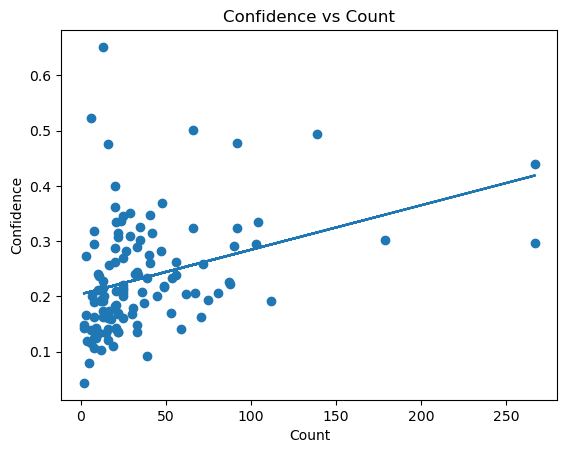

In [516]:

x = p_full['p_count']
y = p_full['p_conf']
# Create Scatter Plot
plt.scatter(x, y)
# Calculate Trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# Plot Trendline
plt.plot(x, p(x))
# Add title and labels
plt.title('Confidence vs Count')
plt.xlabel('Count')
plt.ylabel('Confidence')

#### We can see that there is a correlation between the number of images surveyed and the confidence percentage